In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

<h3>Load data</h3>

In [2]:
iris = load_iris(return_X_y=False, as_frame=True)
X = iris.data[['sepal length (cm)', 'petal length (cm)']].values
y = iris.target.values

In [4]:
X_train = X[:100]
y_train = y[:100]
X_test = X[100:]
y_test = y[100:]

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(100, 2)
(100,)
(50, 2)
(50,)


### Adaline

In [19]:
class AdalineGD:
    """
    ADAptive LInear NEuron classifier.
    
    Parameters
    ----------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset
    random_state : int
      Random number generator seed for random weight initialization
    
    Attributes
    ----------
    w_ : 1D-array
      Weights after fitting (optimization)
    b_ : scalar
      Bias (intercept) after fitting (optimization)
    errors_ : list
      MSE loss function values in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """
        In the notation below, X is assumed to be nxp, and y nx1.
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.0)
        self.losses_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)  # nx1
            output = self.activation(net_input)  # nx1
            errors = y - output  # nx1
            self.w_ += self.eta * 2.0 * X.T @ errors / X.shape[0]  # px1
            self.b_ += self.eta * 2.0 * np.mean(errors)
            loss = np.mean(errors**2)  # MSE as the loss function
            self.losses_.append(loss)
        return self
        
    def net_input(self, X):
        return X @ self.w_ + self.b_  # nx1
    
    def activation(self, X):
        # Linear activation function
        return X
    
    def predict(self, X):        
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

About the underscore naming convention (e.g., `self.w_`):
- In the Data Science community (and ML libraries like sklearn), an underscore at the end of a variable name tells the user: "This variable was created/learned during the fitting process."
    - Before `fit()`: These variables do not exist yet. If you try to access `model.w_` before training, the code will crash.
    - After `fit()`: These variables are now populated with the "knowledge" the model gained from the data.
    
##### Model Attributes Convention

| Feature | Hyperparameters (No underscore) | Learned Parameters (With underscore) |
| :--- | :--- | :--- |
| **Examples** | `self.eta`, `self.n_iter` | `self.w_`, `self.b_`, `self.losses_` |
| **When are they set?** | During initialization (`__init__`) | During the fitting process (`fit`) |
| **Who sets them?** | The human (user-defined) | The algorithm (learned from data) |
| **Purpose** | Configuration/Settings | The "knowledge" or results of training |

### Trying few different learning rates

In [44]:
etas = [0.0001, 0.001, 0.01, 0.1]

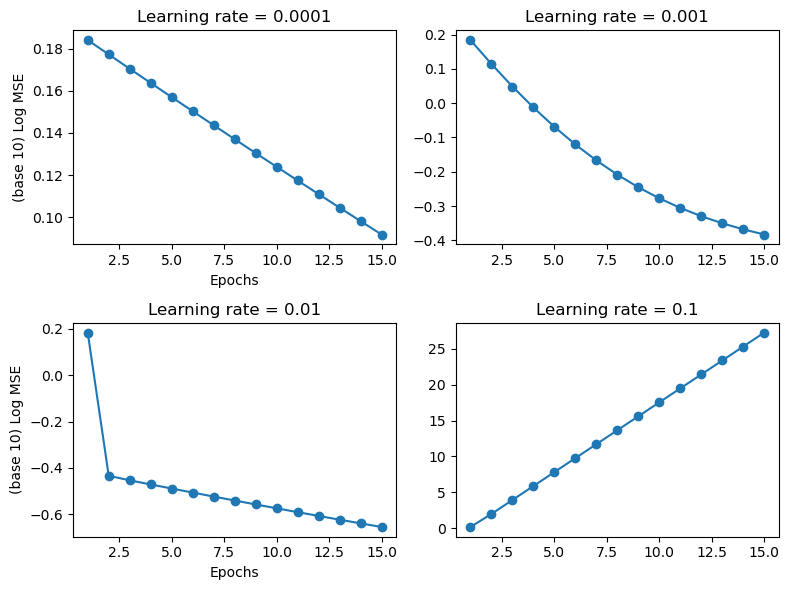

In [45]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
ax = ax.ravel()
for i in range(len(ax)):
    ada = AdalineGD(eta=etas[i], n_iter=15).fit(X, y)
    ax[i].plot(np.arange(1, len(ada.losses_) + 1),
               np.log10(ada.losses_),
               marker='o')
    ax[i].set_title(f'Learning rate = {etas[i]}')
    if (i == 0) or (i==2):
        ax[i].set_xlabel('Epochs')
        ax[i].set_ylabel('(base 10) Log MSE')
    plt.tight_layout();

- When the learning rate $\, \eta \,$ is too small (top left), the converging takes forever (i.e., the learning algorithm would require a very large number of epochs to converge).
- When $\, \eta \,$ is too large (bottom right), then instead of minimizing the loss function, the MSE becomes larger with every epoch, because we overshoot the global minimum.